In [6]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Load dataset
df = pd.read_csv("datasets/diabetes.csv")

# Inspect data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Print DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:xlabel='Outcome', ylabel='count'>

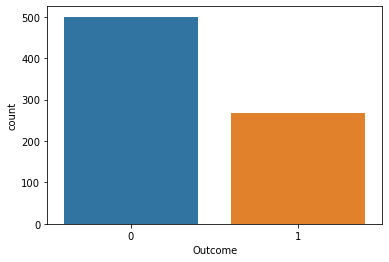

In [8]:
sns.countplot(x=df['Outcome'])

In [9]:
# Print summary statistics
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


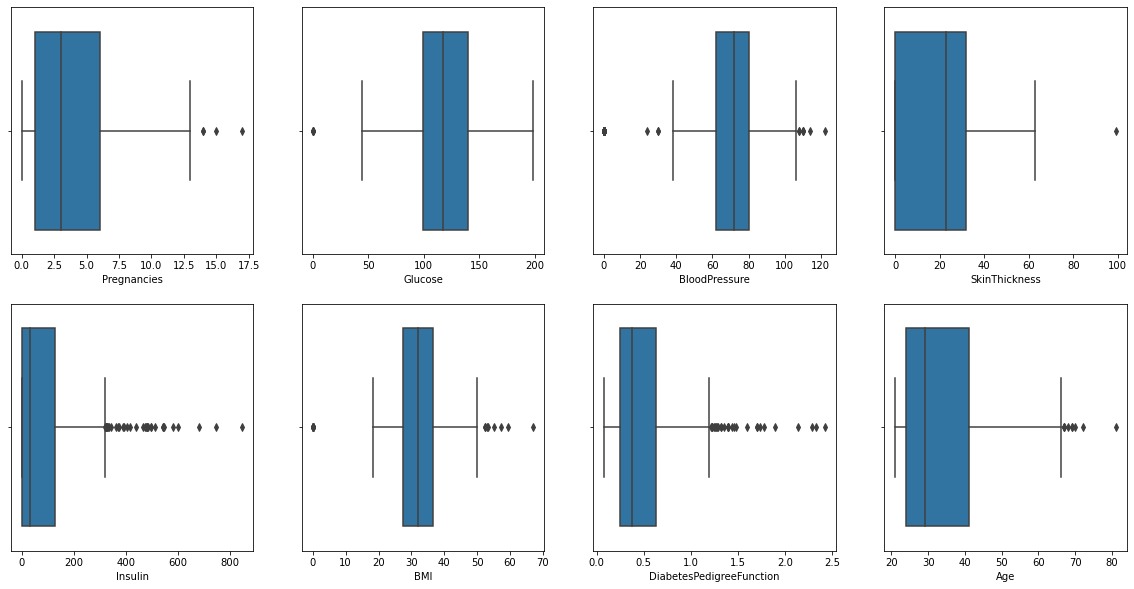

In [10]:
#Univariate analysis
columns = df.columns
counter = 1

f = plt.figure(figsize=(20,10))

for col in df.columns[0:-1]:
    f.add_subplot(2,4,counter)
    sns.boxplot(x=df[col])
    counter = counter + 1

In [11]:
# Check for NAs in data
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
col_dq = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]  # Zero pregancies are deemed a valid result
df[col_dq] = df[col_dq].replace(['0',0], np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df[col_dq] = df[col_dq].fillna(df[col_dq].median())

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


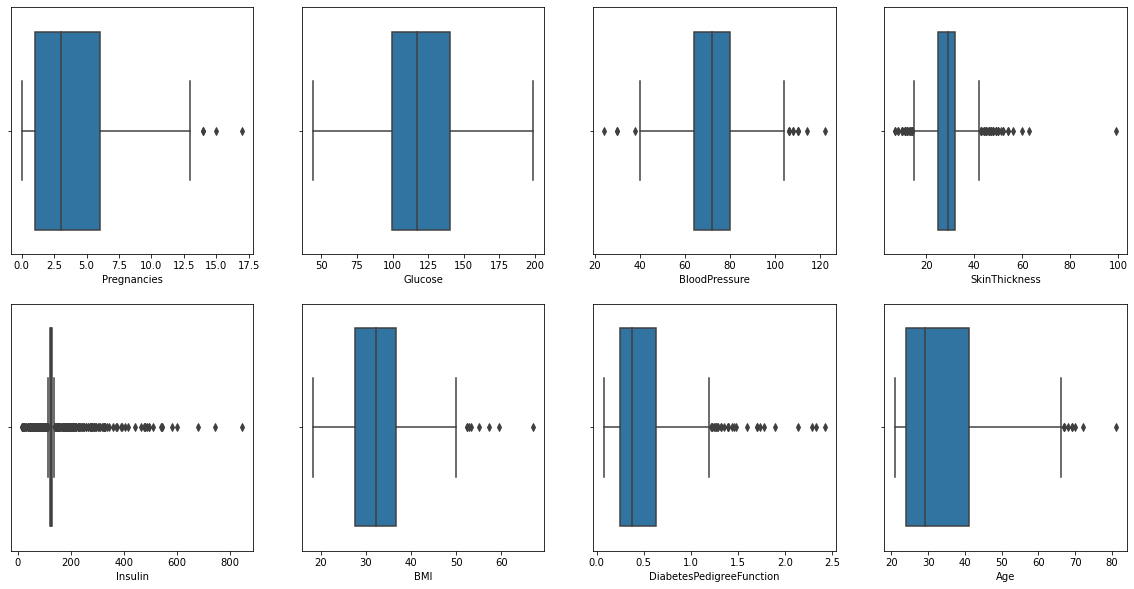

In [16]:
counter = 1

f = plt.figure(figsize=(20,10))

for col in df.columns[0:8]:
    f.add_subplot(2,4,counter)
    sns.boxplot(x=df[col])
    counter = counter + 1

In [17]:
print("DF Shape (before outliers removed): ", df.shape)

DF Shape (before outliers removed):  (768, 9)


In [18]:
columns_outlier_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction']

for c in columns_outlier_check:
    upper_limit = df[c].quantile(0.995)
    lower_limit = df[c].quantile(0.005)
    print(" # upper outliers:" , df[df[c] > upper_limit].shape[0] )
    print(" # lower outliers:" , df[df[c] < lower_limit].shape[0] )
    print(c, upper_limit)
    print(c, lower_limit)
    df = df.loc[(df[c] <= upper_limit) & (df[c] >= lower_limit)]

 # upper outliers: 4
 # lower outliers: 0
Pregnancies 13.164999999999964
Pregnancies 0.0
 # upper outliers: 2
 # lower outliers: 4
Glucose 197.0
Glucose 60.26
 # upper outliers: 2
 # lower outliers: 4
BloodPressure 110.0
BloodPressure 39.57
 # upper outliers: 4
 # lower outliers: 4
SkinThickness 54.49000000000001
SkinThickness 9.51
 # upper outliers: 4
 # lower outliers: 4
Insulin 584.9849999999993
Insulin 20.86
 # upper outliers: 4
 # lower outliers: 4
BMI 50.7475000000001
BMI 18.872500000000002
 # upper outliers: 4
 # lower outliers: 4
DiabetesPedigreeFunction 1.7492500000000004
DiabetesPedigreeFunction 0.086905


In [19]:
print("DF Shape (before outliers removed): ", df.shape)

DF Shape (before outliers removed):  (720, 9)


In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,3.855556,121.725000,72.531944,28.941667,138.151389,32.279167,0.457031,33.252778,0.344444
std,3.259943,29.487027,11.399270,8.090203,75.070597,6.300609,0.295819,11.725772,0.475517
min,0.000000,61.000000,44.000000,10.000000,22.000000,19.100000,0.088000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,125.000000,27.600000,0.242500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.365000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.250000,36.225000,0.612250,41.000000,1.000000
max,13.000000,197.000000,110.000000,54.000000,579.000000,50.000000,1.731000,81.000000,1.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               720 non-null    int64  
 1   Glucose                   720 non-null    float64
 2   BloodPressure             720 non-null    float64
 3   SkinThickness             720 non-null    float64
 4   Insulin                   720 non-null    float64
 5   BMI                       720 non-null    float64
 6   DiabetesPedigreeFunction  720 non-null    float64
 7   Age                       720 non-null    int64  
 8   Outcome                   720 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 56.2 KB


In [22]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

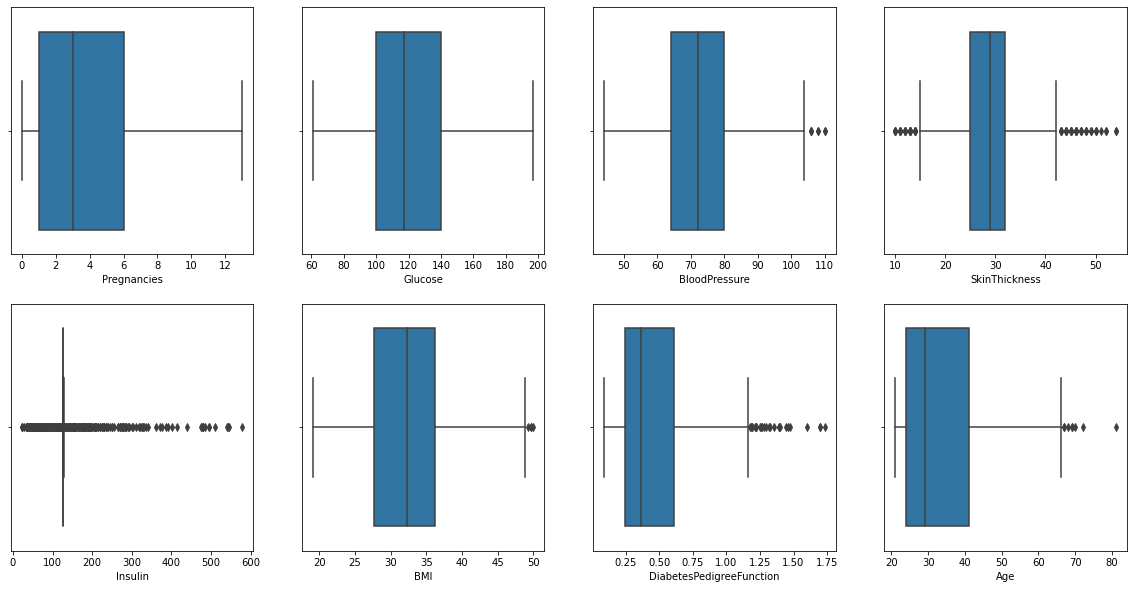

In [25]:
f = plt.figure(figsize=(20,10))
counter =1

for col in df.columns[0:8]:
    f.add_subplot(2,4,counter)
    sns.boxplot(x=df[col])
    counter = counter + 1

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'Pregnancies'),
  Text(1.5, 0, 'Glucose'),
  Text(2.5, 0, 'BloodPressure'),
  Text(3.5, 0, 'SkinThickness'),
  Text(4.5, 0, 'Insulin'),
  Text(5.5, 0, 'BMI'),
  Text(6.5, 0, 'DiabetesPedigreeFunction'),
  Text(7.5, 0, 'Age'),
  Text(8.5, 0, 'Outcome')])

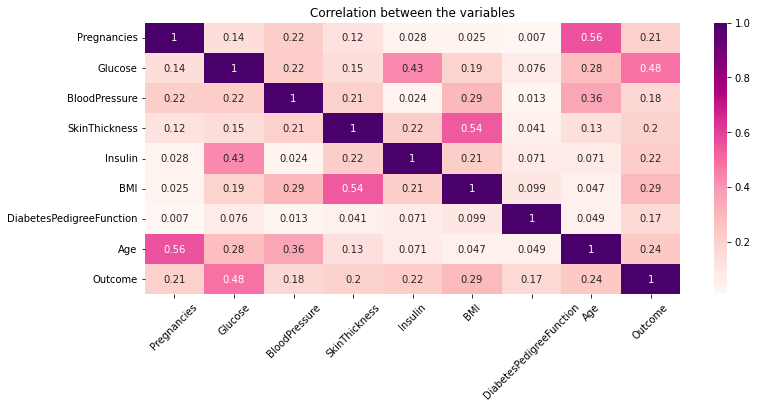

In [26]:
#correlation matrix and the heatmap
plt.subplots(figsize=(12,5))
table_correlation=df.corr()
sns.heatmap(table_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

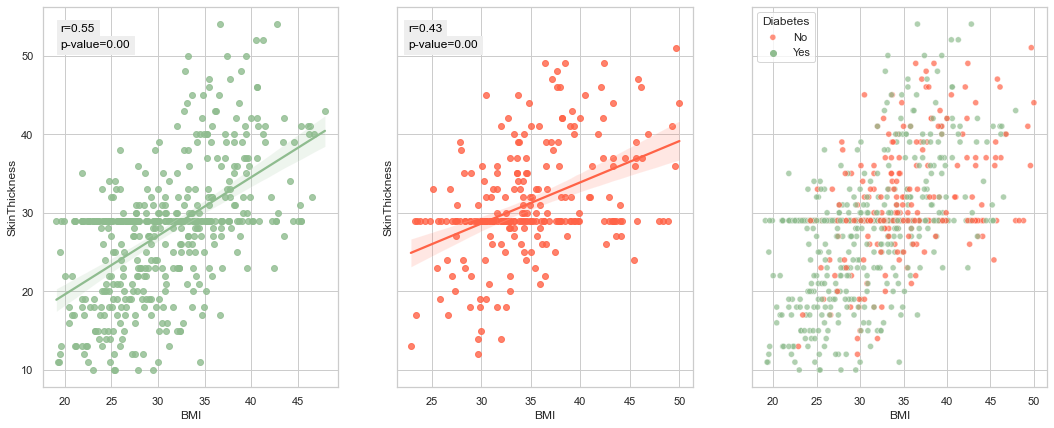

In [27]:
d0_ap_stats = stats.pearsonr(df[df['Outcome'] == 0]['BMI'], 
                             df[df['Outcome'] == 0]['SkinThickness'])

d1_ap_stats = stats.pearsonr(df[df['Outcome'] == 1]['BMI'], 
                             df[df['Outcome'] == 1]['SkinThickness'])
sns.set()
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,3, figsize=(18, 7),sharey=True)

sns.regplot(x='BMI',
            y='SkinThickness',
            data=df[df['Outcome'] == 0],
            ax=ax[0],
            color='darkseagreen'
            );
plt.text(-62, 53, "r={:0.2f}".format(d0_ap_stats[0]), horizontalalignment='left', size='medium', color='black', weight='normal', backgroundcolor= '#EEEEEE')
plt.text(-62, 51, "p-value={:0.2f}".format(d0_ap_stats[1]), horizontalalignment='left', size='medium', color='black', weight='normal', backgroundcolor= '#EEEEEE')

sns.regplot(x='BMI',
            y='SkinThickness',
            data=df[df['Outcome'] == 1],
            ax=ax[1],
            color='tomato'
            );

plt.text(-22, 53, "r={:0.2f}".format(d1_ap_stats[0]), horizontalalignment='left', size='medium', color='black', weight='normal', backgroundcolor= '#EEEEEE')
plt.text(-22, 51, "p-value={:0.2f}".format(d1_ap_stats[1]), horizontalalignment='left', size='medium', color='black', weight='normal', backgroundcolor= '#EEEEEE')

sns.scatterplot(x='BMI',
                y='SkinThickness',
                data=df,
                hue='Outcome',
                ax=ax[2],
                palette=['darkseagreen','tomato'],
                alpha=0.7)
plt.legend(title='Diabetes', loc='upper left', labels=['No', 'Yes'])
plt.show()


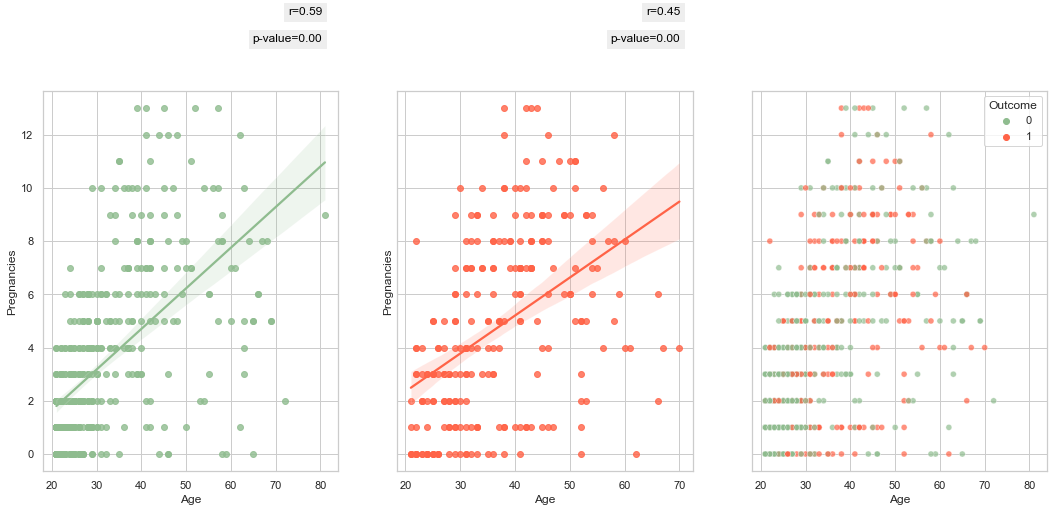

In [28]:
d0_ap_stats = stats.pearsonr(df[df['Outcome'] == 0]['Age'], 
                             df[df['Outcome'] == 0]['Pregnancies'])

d1_ap_stats = stats.pearsonr(df[df['Outcome'] == 1]['Age'], 
                             df[df['Outcome'] == 1]['Pregnancies'])
sns.set()
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,3, figsize=(18, 7),sharey=True)

sns.regplot(x='Age',
            y='Pregnancies',
            data=df[df['Outcome'] == 0],
            ax=ax[0],
            color='darkseagreen'
            );
plt.text(-78, 16.5, "r={:0.2f}".format(d0_ap_stats[0]), horizontalalignment='right', size='medium', color='black', weight='normal', backgroundcolor= '#EEEEEE')
plt.text(-78, 15.5, "p-value={:0.2f}".format(d0_ap_stats[1]), horizontalalignment='right', size='medium', color='black', weight='normal', backgroundcolor= '#EEEEEE')

sns.regplot(x='Age',
            y='Pregnancies',
            data=df[df['Outcome'] == 1],
            ax=ax[1],
            color='tomato'
            );

plt.text(2, 16.5, "r={:0.2f}".format(d1_ap_stats[0]), horizontalalignment='right', size='medium', color='black', weight='normal', backgroundcolor= '#EEEEEE')
plt.text(2, 15.5, "p-value={:0.2f}".format(d1_ap_stats[1]), horizontalalignment='right', size='medium', color='black', weight='normal', backgroundcolor= '#EEEEEE')

sns.scatterplot(x='Age',
                y='Pregnancies',
                data=df,
                hue='Outcome',
                ax=ax[2],
                palette=['darkseagreen','tomato'],
                alpha=0.7)

plt.show()


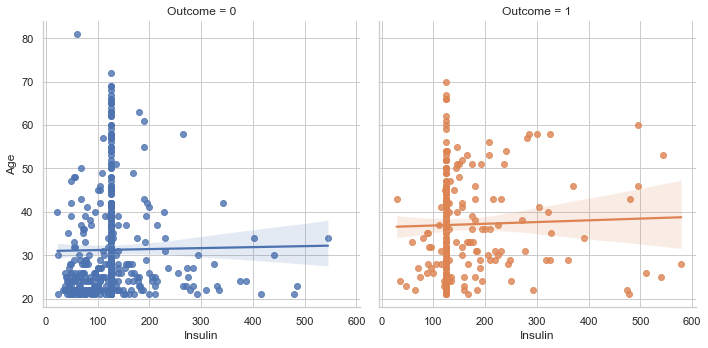

In [29]:
sns.lmplot(x='Insulin',
                y='Age',
                data=df,
           hue="Outcome",
           col="Outcome");
plt.show()

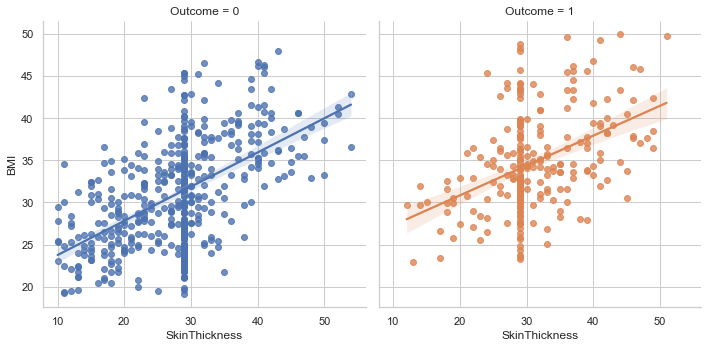

In [30]:
sns.lmplot(x='SkinThickness',
                y='BMI',
                data=df,
           hue="Outcome",
           col="Outcome");
plt.show()

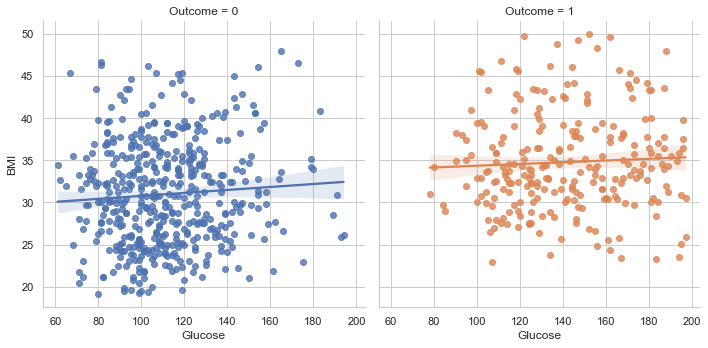

In [31]:
sns.lmplot(x='Glucose',
                y='BMI',
                data=df,
           hue="Outcome",
           col="Outcome");
plt.show()

In [131]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

In [100]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [141]:
clf = KNeighborsClassifier(leaf_size= 1, n_neighbors= 5, p= 2)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
    
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))  
print("F1-Score (Micro): ", f1_score(y_test, y_pred, average="micro"))
print("F1-Score (Weighted): ", f1_score(y_test, y_pred, average="weighted"))
print("F1-Score (Macro): ", f1_score(y_test, y_pred, average="macro"))


              precision    recall  f1-score   support

           0       0.81      0.89      0.85       193
           1       0.72      0.58      0.64        95

    accuracy                           0.79       288
   macro avg       0.77      0.74      0.75       288
weighted avg       0.78      0.79      0.78       288

[[172  21]
 [ 40  55]]
Accuracy Score: 0.7881944444444444
F1-Score (Micro):  0.7881944444444445
F1-Score (Weighted):  0.7813957475994512
F1-Score (Macro):  0.7463287849252761


In [140]:
## KNN: Hyperpaarameter tune 
leaf_size = list(range(1,40))
n_neighbors = list(range(1,15))
p=[2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, 
                       n_neighbors=n_neighbors,
                       p=p)

#Create new KNN object
knn = KNeighborsClassifier()

#Use GridSearch
grid_search = GridSearchCV(knn, hyperparameters, scoring='accuracy', verbose=1)

#Fit the model
grid_results=grid_search.fit(X_train, y_train)

#Print The value of best Hyperparameters
final_model = knn.set_params(**grid_results.best_params_)
final_model.fit(X_train,y_train)
y_pred = final_model.predict(X_test)
                            
print(grid_results.best_params_)    
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))  
print("F1-Score (Micro): ", f1_score(y_test, y_pred, average="micro"))
print("F1-Score (Weighted): ", f1_score(y_test, y_pred, average="weighted"))
print("F1-Score (Macro): ", f1_score(y_test, y_pred, average="macro"))

Fitting 5 folds for each of 546 candidates, totalling 2730 fits
{'leaf_size': 1, 'n_neighbors': 14, 'p': 2}
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       193
           1       0.70      0.48      0.57        95

    accuracy                           0.76       288
   macro avg       0.74      0.69      0.70       288
weighted avg       0.75      0.76      0.75       288

[[173  20]
 [ 49  46]]
Accuracy Score: 0.7604166666666666
F1-Score (Micro):  0.7604166666666666
F1-Score (Weighted):  0.7472102696500288
F1-Score (Macro):  0.7025817555938039


In [129]:
results = {'leaf_size': [],
           'no_neighbors': [],
           'accuracy_score': []}

df_results = pd.DataFrame(results)

for l in leaf_size:
    for n in n_neighbors:
        clf = KNeighborsClassifier(leaf_size= l, n_neighbors= n, p= 2)
        clf.fit(X_train, y_train)
        y_pred=clf.predict(X_test)
        
        accs = accuracy_score(y_test, y_pred)
        
        new_row = {'leaf_size': l, 'no_neighbors': n, 'accuracy_score': accs}
        df_results = df_results.append(new_row, ignore_index=True)
        #print(l, n, accuracy_score(y_test, y_pred))

In [130]:
df_results.loc[df_results['accuracy_score'].idxmax()]

leaf_size         1.000000
no_neighbors      5.000000
accuracy_score    0.788194
Name: 4, dtype: float64

In [196]:
model = KNeighborsClassifier()
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[5,10,15,20,25,30],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))
model_scores['KNN']['after'] = metrics.accuracy_score(prediction,y_test)

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 10, 'weights': 'distance'}
Accuracy: 0.7569444444444444
Confusion Metrix:
 [[169  46]
 [ 24  49]]


In [220]:
for k in model_scores.keys():
    print(k)
    for i in model_scores[k]:
        print('%s: {:0.4f}'.(i, format(model_scores[k][i])))
#print(model_scores)

SyntaxError: invalid syntax (Temp/ipykernel_27860/3456254750.py, line 4)

In [168]:
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

#Prediction
prediction=model1.predict(X_test)

#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))



Best Hyper Parameters:
 {'C': 10, 'kernel': 'linear'}
Accuracy: 0.7951388888888888
Confusion Metrix:
 [[175  41]
 [ 18  54]]


In [170]:
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model1.fit(X_train,y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

#Prediction
prediction=model1.predict(X_test)

#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 123}
Accuracy: 0.7743055555555556
Confusion Metrix:
 [[165  37]
 [ 28  58]]


In [171]:
model= DecisionTreeClassifier(random_state=1234)
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

#Prediction
prediction=model1.predict(X_test)

#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'max_features': 'auto', 'min_samples_leaf': 9, 'min_samples_split': 2, 'random_state': 123}
Accuracy: 0.7361111111111112
Confusion Metrix:
 [[164  47]
 [ 29  48]]


In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,random_state = 999)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

In [35]:
model_scores = {}
models =[('RDF', RandomForestClassifier(n_estimators=100, random_state = 999), True),
         ('DTC', DecisionTreeClassifier(random_state = 999), True),
         ('SVM' , svm.SVC(kernel='linear'), False),
         ('KNN' , KNeighborsClassifier(), False)]

for name, model, fi_flag in models:
    clf = model
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    model_accuracy = metrics.accuracy_score(y_test, y_pred)
    model_scores[name] = {"before": model_accuracy}

    if fi_flag == True :
        feature_imp = pd.Series(clf.feature_importances_,index=X.columns,name=name).sort_values(ascending=False)
        print(feature_imp)
        print('####')
        print('####')

#sns.barplot(x=list(model_scores.keys()),
#            y=list(model_scores['before'].values()))
#plt.show()

print(model_scores)

Glucose                     0.219292
DiabetesPedigreeFunction    0.155200
BMI                         0.138254
Age                         0.136771
Pregnancies                 0.093379
BloodPressure               0.091825
Insulin                     0.089641
SkinThickness               0.075638
Name: RDF, dtype: float64
####
####
Glucose                     0.293755
DiabetesPedigreeFunction    0.175911
Age                         0.142671
BMI                         0.105622
BloodPressure               0.084914
Insulin                     0.069303
Pregnancies                 0.065582
SkinThickness               0.062243
Name: DTC, dtype: float64
####
####
{'RDF': {'before': 0.78125}, 'DTC': {'before': 0.7152777777777778}, 'SVM': {'before': 0.7951388888888888}, 'KNN': {'before': 0.7881944444444444}}


In [602]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Glucose                     0.214605
DiabetesPedigreeFunction    0.150248
BMI                         0.144741
Age                         0.137202
Pregnancies                 0.094172
BloodPressure               0.093679
Insulin                     0.092551
SkinThickness               0.072802
dtype: float64

In [657]:
# Create a k-NN classifier with 3 neighbors: knn
knn= KNeighborsClassifier(n_neighbors=7,leaf_size=2, p=1)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Print the accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.7604166666666666


In [604]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7951388888888888


In [605]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train_s, y_train)
y_pred=clf.predict(X_test_s)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7916666666666666


In [606]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[175,  18],
       [ 42,  53]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

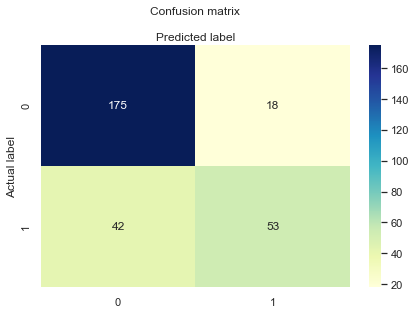

In [607]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

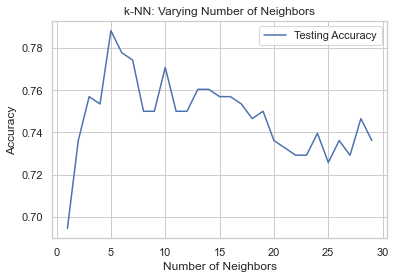

In [608]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    #train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
#plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.show()

In [609]:
def scale_prediction(my_array):
    my_array_reshaped = np.array(my_array).reshape(1, -1)
    my_array_minmax = scaler.fit_transform(my_array_reshaped)
    return my_array_minmax

def scale_reshape(my_array):
    my_array_reshape = np.array(my_array).reshape(1, -1)
    return my_array_reshape

In [75]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X,y)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 7
